# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port lincoln
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | nuuk
Processing Record 9 of Set 1 | aki
Processing Record 10 of Set 1 | colac
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | brookings
Processing Record 13 of Set 1 | kapa'a
Processing Record 14 of Set 1 | itaituba
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | haiku-pauwela
Processing Record 17 of Set 1 | hadibu
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | urangan
Processing Record 20 of Set 1 | usakos
Processing Record 21 of Set 1 | trebisacce
Processing Record 22 of Set 1 | ilulissat
Pr

In [22]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port lincoln,-34.7333,135.8667,291.30,70,83,6.06,AU,1711583087
1,waitangi,-43.9535,-176.5597,286.94,76,100,1.79,NZ,1711583090
2,sitka,57.0531,-135.3300,284.09,58,40,3.60,US,1711583087
3,ribeira grande,38.5167,-28.7000,283.58,77,100,10.28,PT,1711583097
4,margaret river,-33.9500,115.0667,291.13,67,0,1.96,AU,1711583096


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port lincoln,-34.7333,135.8667,291.30,70,83,6.06,AU,1711583087
1,waitangi,-43.9535,-176.5597,286.94,76,100,1.79,NZ,1711583090
2,sitka,57.0531,-135.3300,284.09,58,40,3.60,US,1711583087
3,ribeira grande,38.5167,-28.7000,283.58,77,100,10.28,PT,1711583097
4,margaret river,-33.9500,115.0667,291.13,67,0,1.96,AU,1711583096


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

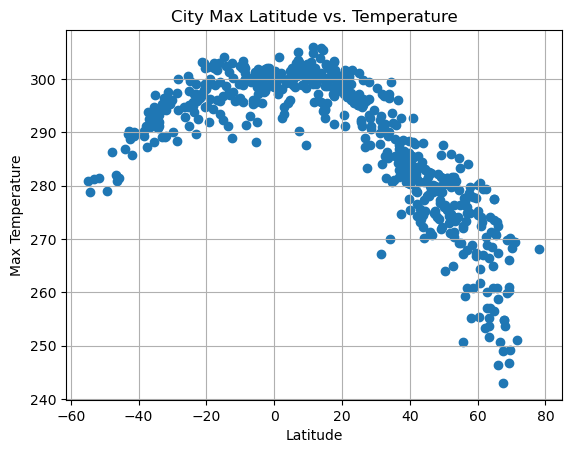

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

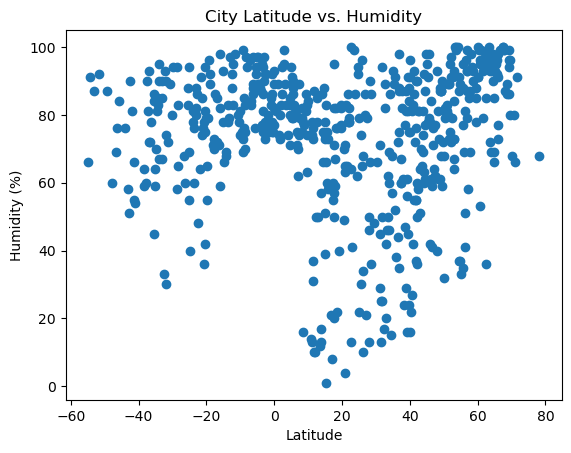

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

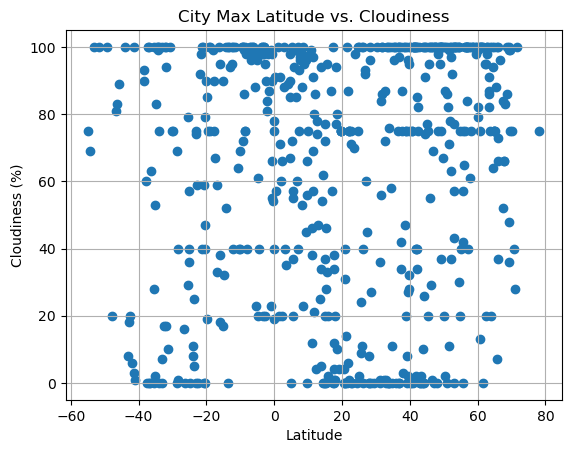

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

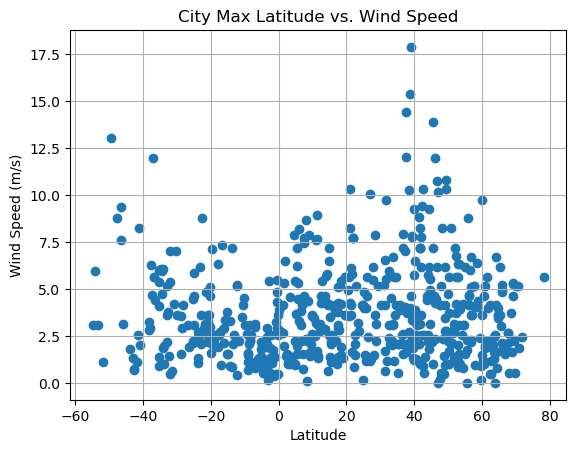

In [32]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [67]:
# Define a function to create Linear Regression plots
def LinearRegressionPlots(dataframe, x, y, x_label, y_label):
    s, inter, r, p, stderr = linregress(dataframe[x], dataframe[y])
    plt.plot(dataframe[x], dataframe[x]*s + inter, "r")
    plt.scatter(dataframe[x], dataframe[y])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.text(dataframe[x].min(), dataframe[y].min(), f"y = {s}*x + {inter}")
    print(f"The r value is: {r}")
    plt.show()

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,sitka,57.0531,-135.3300,284.09,58,40,3.60,US,1711583087
3,ribeira grande,38.5167,-28.7000,283.58,77,100,10.28,PT,1711583097
7,nuuk,64.1835,-51.7216,268.49,93,100,4.12,GL,1711582833
8,aki,33.5000,133.9000,285.12,62,100,2.04,JP,1711583213
11,brookings,44.3114,-96.7984,270.15,63,0,6.17,US,1711583213


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port lincoln,-34.7333,135.8667,291.30,70,83,6.06,AU,1711583087
1,waitangi,-43.9535,-176.5597,286.94,76,100,1.79,NZ,1711583090
4,margaret river,-33.9500,115.0667,291.13,67,0,1.96,AU,1711583096
5,ushuaia,-54.8000,-68.3000,280.96,66,75,3.09,AR,1711583071
6,port-aux-francais,-49.3500,70.2167,278.96,87,100,13.00,TF,1711583091


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8948069587031019


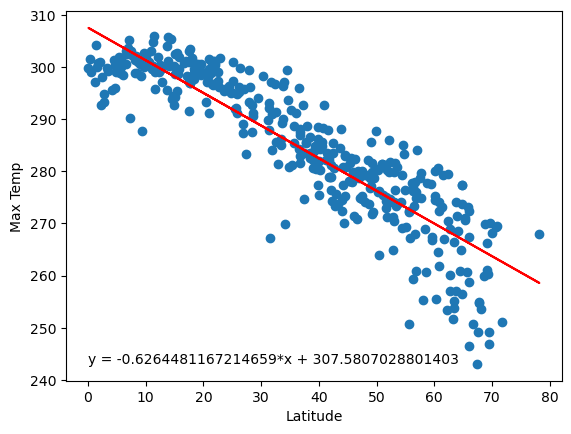

In [72]:
# Linear regression on Northern Hemisphere
LinearRegressionPlots(northern_hemi_df, "Lat", "Max Temp", "Latitude", "Max Temp")

The r value is: 0.7604463976306322


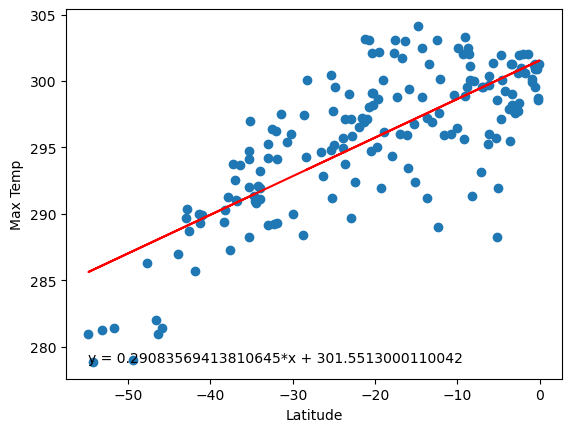

In [73]:
# Linear regression on Southern Hemisphere
LinearRegressionPlots(southern_hemi_df, "Lat", "Max Temp", "Latitude", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.2582298144183171


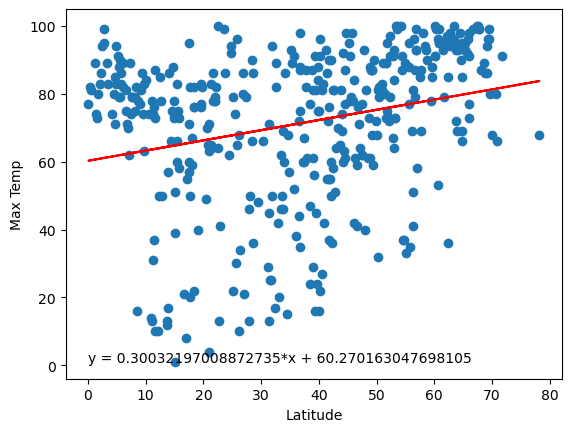

In [74]:
# Northern Hemisphere
LinearRegressionPlots(northern_hemi_df, "Lat", "Humidity", "Latitude", "Max Temp")

The r value is: 0.3090102722286857


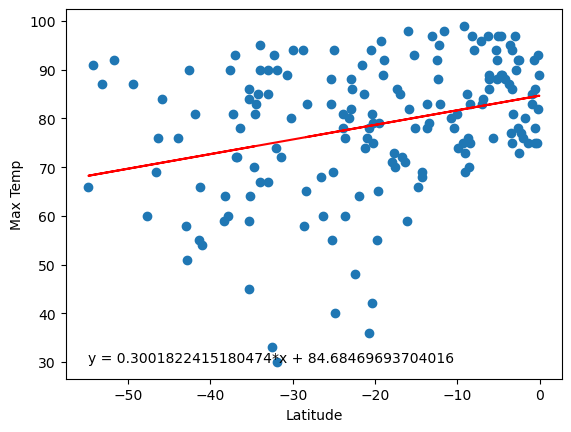

In [75]:
# Southern Hemisphere
LinearRegressionPlots(southern_hemi_df, "Lat", "Humidity", "Latitude", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.21191473931913765


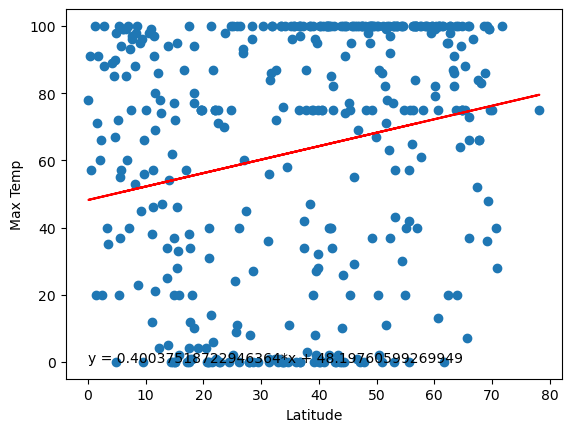

In [76]:
# Northern Hemisphere
LinearRegressionPlots(northern_hemi_df, "Lat", "Cloudiness", "Latitude", "Max Temp")

The r value is: 0.23718807532367892


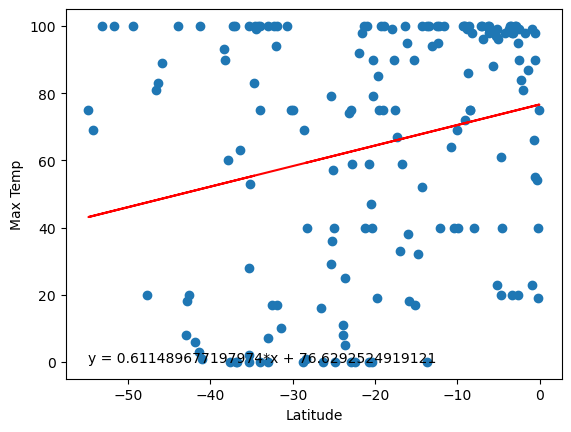

In [77]:
# Southern Hemisphere
LinearRegressionPlots(southern_hemi_df, "Lat", "Cloudiness", "Latitude", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.024010238075032747


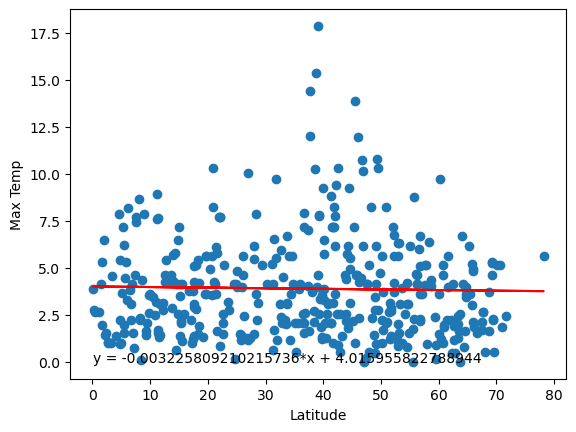

In [78]:
# Northern Hemisphere
LinearRegressionPlots(northern_hemi_df, "Lat", "Wind Speed", "Latitude", "Max Temp")

The r value is: -0.40305914302428575


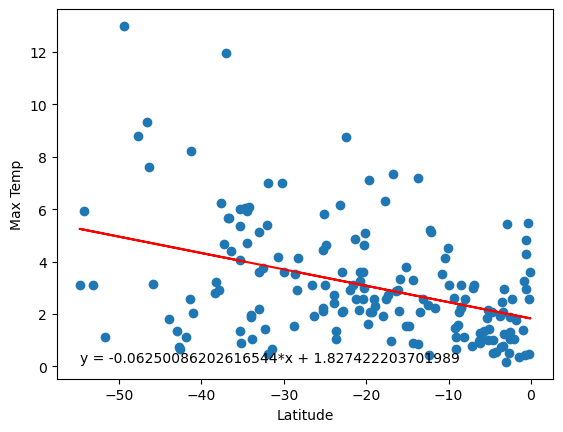

In [79]:
# Southern Hemisphere
LinearRegressionPlots(southern_hemi_df, "Lat", "Wind Speed", "Latitude", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE